In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

data = pd.read_excel("AMRI 2016-2019新.xlsx", sheet_name='2016-2019')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data.head()

,Year,Vendor Number,Payment Terms,PO Number,PO Line Number,PO Header Creation Date,Category,Subcategory,Item Number,Need By Date,Promised Date,Quantity Ordered,Quantity Delivered,Quantity Billed,Quantity Uninvoiced,PO Currency Code,Unit Price,Line Value,UOM (Unit of Measurement),Receipt Num-Date,Receipt Date,COO,Estimated date,order fill capacity,early_or_late,unaccpetable delievry,expensive order
0,2016,500077,Net 60,20000000,1,2016-07-03,Chemicals,Intermediates,100021,2016-06-27,2016-06-27,120.0,120.0,0.0,120.0,USD,0.0,0.0,Kilogram,8#06-JUL-2016,2016-07-06,China,-6.0,1.0,9,2,0
1,2016,500039,Net 45,20000000,1,2016-07-03,Precious Metal,Catalyst Fabrication,100025,2016-09-25,2016-09-25,297.0,297.0,297.0,0.0,USD,67.4,20018.0,Dry Weight,221#12-AUG-2016;279#21-AUG-2016;28#12-JUL-2016...,2016-09-20,USA,84.0,1.0,-5,0,0
2,2016,500039,Net 45,20000000,1,2016-07-03,Precious Metal,Catalyst Fabrication,100025,2016-07-08,2016-07-08,363.0,363.0,363.0,0.0,USD,67.4,24466.0,Dry Weight,221#12-AUG-2016;279#21-AUG-2016;28#12-JUL-2016...,2016-07-12,USA,5.0,1.0,4,0,0
3,2016,500039,Net 45,20000000,1,2016-07-03,Precious Metal,Catalyst Fabrication,100025,2016-07-25,2016-07-25,363.0,363.0,363.0,0.0,USD,67.4,24466.0,Dry Weight,221#12-AUG-2016;279#21-AUG-2016;28#12-JUL-2016...,2016-07-19,USA,22.0,1.0,-6,0,0
4,2016,500039,Net 45,20000000,1,2016-07-03,Precious Metal,Catalyst Fabrication,100025,2016-08-08,2016-08-08,363.0,363.0,363.0,0.0,USD,67.4,24466.0,Dry Weight,221#12-AUG-2016;279#21-AUG-2016;28#12-JUL-2016...,2016-08-12,USA,36.0,1.0,4,0,0


In [0]:
#single supplier items
supplier_items = data.groupby('Item Number')['Vendor Number'].count()
item_group = pd.DataFrame(supplier_items)
item_group.reset_index(drop=False,inplace=True)


item_join = pd.merge(data, item_group,on = "Item Number", how = "inner")
single_supplier_item = []
i = 0
for i in range(0,(len(item_join["Vendor Number_y"]))):
  if item_join["Vendor Number_y"][i] == 1:
    single_supplier_item.append(1)
  else:
    single_supplier_item.append(0)
  i += 1

data['single_supplier_items'] = single_supplier_item

In [0]:
data = data.dropna(subset=["Receipt Date"])

In [0]:
# drop columns
data2019 = data.drop(columns=['Year', 'PO Header Creation Date', 'Need By Date', 'Promised Date', 'Quantity Delivered', 'Quantity Billed', 'Quantity Uninvoiced', 
                          'PO Currency Code', 'UOM (Unit of Measurement)', 'Receipt Num-Date', 'Receipt Date'])

In [0]:
data2019

,Vendor Number,Payment Terms,PO Number,PO Line Number,Category,Subcategory,Item Number,Quantity Ordered,Unit Price,Line Value,COO,Estimated date,order fill capacity,early_or_late,unaccpetable delievry,expensive order,single_supplier_items
0,500077,Net 60,20000000,1,Chemicals,Intermediates,100021,120.0,0.0000,0.0,China,-6.000000,1.000000,9,2,0,0
1,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,297.0,67.4000,20018.0,USA,84.000000,1.000000,-5,0,0,0
2,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,363.0,67.4000,24466.0,USA,5.000000,1.000000,4,0,0,0
3,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,363.0,67.4000,24466.0,USA,22.000000,1.000000,-6,0,0,0
4,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,363.0,67.4000,24466.0,USA,36.000000,1.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,500058,Net 30,223859,1,Chemicals,Solvents-tanker,100069,33000.0,0.2138,7055.4,USA,-0.606944,1.000000,10,2,0,0
1577,500058,Net 30,223860,1,Chemicals,Solvents-tanker,100027,45000.0,0.1650,7425.0,USA,13.389583,1.000000,0,0,0,1
1579,500011,Net 30,223916,1,Chemicals,Commodity,100124,6300.0,0.6000,3780.0,USA,2.575694,1.000000,0,0,0,1
1580,500058,Net 30,223925,1,Chemicals,Solvents-tanker,100069,33000.0,0.2138,7055.4,USA,3.450694,1.000000,0,0,0,1


#Feature Engineering

In [0]:
# unique COO 
data2019['COO'].unique()
#data2019.tail()

array(['China', 'USA', 'France', 'India', 'Taiwan', 'UK', 'Germany',
       'MEXICO', 'South Africa', 'Proprietary', 'Spain', 'india',
       'The Netherlands', 'Korea', 'Canada', 'Japan', 'England',
       'Argentina'], dtype=object)

In [0]:
# political index(long-term)
political_index_USA = 82.6
political_index_France = 80.6
political_index_China = 66.4
political_index_India = 73.4
political_index_Spain = 68.9
political_index_Canada = 92.3
political_index_Argentina = 61.6
political_index_TheNetherlands = 87.5
political_index_MEXICO = 58.3
political_index_Taiwan = 75.1
political_index_UK = 82.7
political_index_Germany = 87.2
political_index_Japan = 87.3
political_index_SouthAfrica = 61.3
political_index_England = 82.7
political_index_Korea = 82.5

In [0]:
# economic index(long-term)
economic_index_USA = 76.4
economic_index_France = 75.4
economic_index_China = 77.1
economic_index_India = 62.6
economic_index_Spain = 61.7
economic_index_Canada = 73.0
economic_index_Argentina = 53.2
economic_index_TheNetherlands = 73.6
economic_index_MEXICO = 64.4
economic_index_Taiwan = 76.3
economic_index_UK = 74.8
economic_index_Germany = 73.8
economic_index_Japan = 69.2
economic_index_SouthAfrica = 58.3
economic_index_England = 73.8
economic_index_Korea = 80.4

In [0]:
# political risk
data2019['political index'] = 0
data2019.loc[data2019['COO'] == 'USA', 'political index'] = political_index_USA
data2019.loc[data2019['COO'] == 'France', 'political index'] = political_index_France
data2019.loc[data2019['COO'] == 'China', 'political index'] = political_index_China
data2019.loc[data2019['COO'] == 'India', 'political index'] = political_index_India
data2019.loc[data2019['COO'] == 'Spain', 'political index'] = political_index_Spain
data2019.loc[data2019['COO'] == 'Canada', 'political index'] = political_index_Canada
data2019.loc[data2019['COO'] == 'Argentina', 'political index'] = political_index_Argentina
data2019.loc[data2019['COO'] == 'The Netherlands', 'political index'] = political_index_TheNetherlands
data2019.loc[data2019['COO'] == 'MEXICO', 'political index'] = political_index_MEXICO
data2019.loc[data2019['COO'] == 'Taiwan', 'political index'] = political_index_Taiwan
data2019.loc[data2019['COO'] == 'UK', 'political index'] = political_index_UK
data2019.loc[data2019['COO'] == 'Germany', 'political index'] = political_index_Germany
data2019.loc[data2019['COO'] == 'Japan', 'political index'] = political_index_Japan
data2019.loc[data2019['COO'] == 'South Africa', 'political index'] = political_index_SouthAfrica
data2019.loc[data2019['COO'] == 'England', 'political index'] = political_index_England
data2019.loc[data2019['COO'] == 'Korea', 'political index'] = political_index_Korea
data2019.loc[data2019['COO'] == 'india', 'political index'] = political_index_India
data2019.loc[data2019['COO'] == 'Proprietary', 'political index'] = political_index_USA

In [0]:
# economic risk
data2019['economic index'] = 0
data2019.loc[data2019['COO'] == 'USA', 'economic index'] = economic_index_USA
data2019.loc[data2019['COO'] == 'France', 'economic index'] = economic_index_France
data2019.loc[data2019['COO'] == 'China', 'economic index'] = economic_index_China
data2019.loc[data2019['COO'] == 'India', 'economic index'] = economic_index_India
data2019.loc[data2019['COO'] == 'Spain', 'economic index'] = economic_index_Spain
data2019.loc[data2019['COO'] == 'Canada', 'economic index'] = economic_index_Canada
data2019.loc[data2019['COO'] == 'Argentina', 'economic index'] = economic_index_Argentina
data2019.loc[data2019['COO'] == 'The Netherlands', 'economic index'] = economic_index_TheNetherlands
data2019.loc[data2019['COO'] == 'MEXICO', 'economic index'] = economic_index_MEXICO
data2019.loc[data2019['COO'] == 'Taiwan', 'economic index'] = economic_index_Taiwan
data2019.loc[data2019['COO'] == 'UK', 'economic index'] = economic_index_UK
data2019.loc[data2019['COO'] == 'Germany', 'economic index'] = economic_index_Germany
data2019.loc[data2019['COO'] == 'Japan', 'economic index'] = economic_index_Japan
data2019.loc[data2019['COO'] == 'South Africa', 'economic index'] = economic_index_SouthAfrica
data2019.loc[data2019['COO'] == 'England', 'economic index'] = economic_index_England
data2019.loc[data2019['COO'] == 'Korea', 'economic index'] = economic_index_Korea
data2019.loc[data2019['COO'] == 'india', 'economic index'] = economic_index_India
data2019.loc[data2019['COO'] == 'Proprietary', 'economic index'] = economic_index_USA

In [0]:
data2019.head()

,Vendor Number,Payment Terms,PO Number,PO Line Number,Category,Subcategory,Item Number,Quantity Ordered,Unit Price,Line Value,COO,Estimated date,order fill capacity,early_or_late,unaccpetable delievry,expensive order,single_supplier_items,political index,economic index
0,500077,Net 60,20000000,1,Chemicals,Intermediates,100021,120.0,0.0,0.0,China,-6.0,1.0,9,2,0,0,66.4,77.1
1,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,297.0,67.4,20018.0,USA,84.0,1.0,-5,0,0,0,82.6,76.4
2,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,363.0,67.4,24466.0,USA,5.0,1.0,4,0,0,0,82.6,76.4
3,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,363.0,67.4,24466.0,USA,22.0,1.0,-6,0,0,0,82.6,76.4
4,500039,Net 45,20000000,1,Precious Metal,Catalyst Fabrication,100025,363.0,67.4,24466.0,USA,36.0,1.0,4,0,0,0,82.6,76.4


In [0]:
# create variance
variance = data2019["early_or_late"].groupby(data2019["Vendor Number"]).var().fillna(0)
dfvariance= pd.DataFrame(variance)
dfvariance.reset_index(drop=False,inplace=True)
data2019["Lead time variability"] = None
# fill the Lead time variability
aa=dfvariance['Vendor Number']
for i in range(len(aa)):
   data2019.loc[data2019['Vendor Number'] ==aa[i],'Lead time variability']=dfvariance.loc[dfvariance['Vendor Number']==aa[i],'early_or_late'].tolist()

In [0]:
# delivery days(categorical variable)
data2019.loc[data2019["COO"] == "USA", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "Proprietary", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "France", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "China", "Delivery Days Needed"] = "3-5 days"
data2019.loc[data2019["COO"] == "India", "Delivery Days Needed"] = "3-5 days"
data2019.loc[data2019["COO"] == "UK", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "Spain", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "Canada", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "Argentina", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "The Netherlands", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "MEXICO", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "Taiwan", "Delivery Days Needed"] = "3-5 days"
data2019.loc[data2019["COO"] == "Germany", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "Japan", "Delivery Days Needed"] = "3-5 days"
data2019.loc[data2019["COO"] == "South Africa", "Delivery Days Needed"] = "3-5 days"
data2019.loc[data2019["COO"] == "india", "Delivery Days Needed"] = "3-5 days"
data2019.loc[data2019["COO"] == "England", "Delivery Days Needed"] = "next day"
data2019.loc[data2019["COO"] == "Korea", "Delivery Days Needed"] = "3-5 days"

In [0]:
# price standard devidation
pstd_cal = data2019[data2019["Unit Price"] != 0]
groupby3 = pstd_cal["Unit Price"].groupby(pstd_cal["Item Number"]).std().fillna(0)
groupby3 = pd.DataFrame(groupby3)
groupby3.reset_index(drop=False,inplace=True)
col1=["Item Number","price sd"]
groupby3.columns=col1
groupby3

pricesd = pd.merge(data2019,groupby3,on="Item Number",how="inner")
pricesd
data2019 = pricesd
data2019

,Vendor Number,Payment Terms,PO Number,PO Line Number,Category,Subcategory,Item Number,Quantity Ordered,Unit Price,Line Value,COO,Estimated date,order fill capacity,early_or_late,unaccpetable delievry,expensive order,single_supplier_items,political index,economic index,Lead time variability,Delivery Days Needed,price sd
0,500077,Net 60,20000000,1,Chemicals,Intermediates,100021,120.00,0.00,0.00,China,-6.000000,1.000000,9,2,0,0,66.4,77.1,0,3-5 days,154.670348
1,500009,Net 60,205631,1,Chemicals,Intermediates,100021,380.00,2430.00,923400.00,China,91.000000,1.000000,-7,0,1,0,66.4,77.1,292.571,3-5 days,154.670348
2,500009,Net 60,212251,1,Chemicals,Intermediates,100021,180.00,2425.00,436500.00,China,98.000000,1.000000,8,2,1,0,66.4,77.1,292.571,3-5 days,154.670348
3,500009,Net 30,215385,1,Chemicals,Intermediates,100021,420.00,2170.00,911400.00,China,77.000000,1.023810,7,0,1,0,66.4,77.1,292.571,3-5 days,154.670348
4,500009,Net 30,219224,1,Chemicals,Intermediates,100021,300.00,2150.00,645000.00,China,69.383333,1.000000,10,2,1,0,66.4,77.1,292.571,3-5 days,154.670348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,500019,Net 30,222760,1,Finished,Goods,100123,19.58,1.00,19.58,USA,-0.448611,1.000000,0,0,0,0,82.6,76.4,3.47619,next day,0.000000
1426,500021,Net 30,222764,1,Chemicals,Commodity,100089,525.00,5.85,3071.30,Japan,28.458333,1.000000,-3,0,0,0,87.3,69.2,1960.89,3-5 days,0.000000
1427,500021,Net 30,223008,1,Chemicals,Commodity,100097,100.00,100.00,10000.00,USA,17.310417,1.000000,-4,0,0,0,82.6,76.4,1960.89,next day,0.000000
1428,500008,Net 45,223050,1,Precious Metal,Raw Materials,100122,2250.60,1730.00,4000000.00,USA,0.411111,1.000000,1,0,1,0,82.6,76.4,0,next day,0.000000


In [0]:
# Late delivery rate: the number of the late delivered orders / the number of total orders
'''
data2019['delivery delay'] = 0
data2019.loc[data2019['early_or_late'] >7, 'delivery delay'] = 1
data2019.loc[data2019['early_or_late'] <-7, 'delivery delay'] = 1

groupby1 = data2019["delivery delay"].groupby(data2019["Item Number"]).sum().fillna(0)
groupby1 = pd.DataFrame(groupby1)
groupby1.reset_index(drop=False,inplace=True)
groupby2 = data2019["Item Number"].groupby(data2019["Item Number"]).count().fillna(0)
groupby2 = pd.DataFrame(groupby2)
groupby2.reset_index(drop=True,inplace=True)
group = pd.concat( [groupby1, groupby2], axis=1 )
col=["Item Number","delivery delay","total"]
group.columns=col
  
group["laterate"]=group["delivery delay"]/group["total"]
group

join=pd.merge(data2019,group,on="Item Number",how="inner")
join
data2019=join
'''

'\ndata2019[\'delivery delay\'] = 0\ndata2019.loc[data2019[\'early_or_late\'] >7, \'delivery delay\'] = 1\ndata2019.loc[data2019[\'early_or_late\'] <-7, \'delivery delay\'] = 1\n\ngroupby1 = data2019["delivery delay"].groupby(data2019["Item Number"]).sum().fillna(0)\ngroupby1 = pd.DataFrame(groupby1)\ngroupby1.reset_index(drop=False,inplace=True)\ngroupby2 = data2019["Item Number"].groupby(data2019["Item Number"]).count().fillna(0)\ngroupby2 = pd.DataFrame(groupby2)\ngroupby2.reset_index(drop=True,inplace=True)\ngroup = pd.concat( [groupby1, groupby2], axis=1 )\ncol=["Item Number","delivery delay","total"]\ngroup.columns=col\n  \ngroup["laterate"]=group["delivery delay"]/group["total"]\ngroup\n\njoin=pd.merge(data2019,group,on="Item Number",how="inner")\njoin\ndata2019=join\n'

In [0]:
data2019

,Vendor Number,Payment Terms,PO Number,PO Line Number,Category,Subcategory,Item Number,Quantity Ordered,Unit Price,Line Value,COO,Estimated date,order fill capacity,early_or_late,unaccpetable delievry,expensive order,single_supplier_items,political index,economic index,Lead time variability,Delivery Days Needed,price sd
0,500077,Net 60,20000000,1,Chemicals,Intermediates,100021,120.00,0.00,0.00,China,-6.000000,1.000000,9,2,0,0,66.4,77.1,0,3-5 days,154.670348
1,500009,Net 60,205631,1,Chemicals,Intermediates,100021,380.00,2430.00,923400.00,China,91.000000,1.000000,-7,0,1,0,66.4,77.1,292.571,3-5 days,154.670348
2,500009,Net 60,212251,1,Chemicals,Intermediates,100021,180.00,2425.00,436500.00,China,98.000000,1.000000,8,2,1,0,66.4,77.1,292.571,3-5 days,154.670348
3,500009,Net 30,215385,1,Chemicals,Intermediates,100021,420.00,2170.00,911400.00,China,77.000000,1.023810,7,0,1,0,66.4,77.1,292.571,3-5 days,154.670348
4,500009,Net 30,219224,1,Chemicals,Intermediates,100021,300.00,2150.00,645000.00,China,69.383333,1.000000,10,2,1,0,66.4,77.1,292.571,3-5 days,154.670348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,500019,Net 30,222760,1,Finished,Goods,100123,19.58,1.00,19.58,USA,-0.448611,1.000000,0,0,0,0,82.6,76.4,3.47619,next day,0.000000
1426,500021,Net 30,222764,1,Chemicals,Commodity,100089,525.00,5.85,3071.30,Japan,28.458333,1.000000,-3,0,0,0,87.3,69.2,1960.89,3-5 days,0.000000
1427,500021,Net 30,223008,1,Chemicals,Commodity,100097,100.00,100.00,10000.00,USA,17.310417,1.000000,-4,0,0,0,82.6,76.4,1960.89,next day,0.000000
1428,500008,Net 45,223050,1,Precious Metal,Raw Materials,100122,2250.60,1730.00,4000000.00,USA,0.411111,1.000000,1,0,1,0,82.6,76.4,0,next day,0.000000


In [0]:
# drop columns
df = data2019.drop(columns=['PO Number','Vendor Number','Item Number','Unit Price'])

In [0]:
df

,Payment Terms,PO Line Number,Category,Subcategory,Quantity Ordered,Line Value,COO,Estimated date,order fill capacity,early_or_late,unaccpetable delievry,expensive order,single_supplier_items,political index,economic index,Lead time variability,Delivery Days Needed,price sd
0,Net 60,1,Chemicals,Intermediates,120.00,0.00,China,-6.000000,1.000000,9,2,0,0,66.4,77.1,0,3-5 days,154.670348
1,Net 60,1,Chemicals,Intermediates,380.00,923400.00,China,91.000000,1.000000,-7,0,1,0,66.4,77.1,292.571,3-5 days,154.670348
2,Net 60,1,Chemicals,Intermediates,180.00,436500.00,China,98.000000,1.000000,8,2,1,0,66.4,77.1,292.571,3-5 days,154.670348
3,Net 30,1,Chemicals,Intermediates,420.00,911400.00,China,77.000000,1.023810,7,0,1,0,66.4,77.1,292.571,3-5 days,154.670348
4,Net 30,1,Chemicals,Intermediates,300.00,645000.00,China,69.383333,1.000000,10,2,1,0,66.4,77.1,292.571,3-5 days,154.670348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,Net 30,1,Finished,Goods,19.58,19.58,USA,-0.448611,1.000000,0,0,0,0,82.6,76.4,3.47619,next day,0.000000
1426,Net 30,1,Chemicals,Commodity,525.00,3071.30,Japan,28.458333,1.000000,-3,0,0,0,87.3,69.2,1960.89,3-5 days,0.000000
1427,Net 30,1,Chemicals,Commodity,100.00,10000.00,USA,17.310417,1.000000,-4,0,0,0,82.6,76.4,1960.89,next day,0.000000
1428,Net 45,1,Precious Metal,Raw Materials,2250.60,4000000.00,USA,0.411111,1.000000,1,0,1,0,82.6,76.4,0,next day,0.000000


In [0]:
#Normalization
def Normalization(x):
    return [(float(i)-min(x))/float(max(x)-min(x)) for i in x]

df["Lead time variability_Norm"] = Normalization(df["Lead time variability"])
df["price sd_Norm"] = Normalization(df["price sd"])
y_reg = df["early_or_late"]
y_cls = df["unaccpetable delievry"]
x = df.drop(columns = ["early_or_late", "unaccpetable delievry", "Lead time variability", "price sd"])
x

,Payment Terms,PO Line Number,Category,Subcategory,Quantity Ordered,Line Value,COO,Estimated date,order fill capacity,expensive order,single_supplier_items,political index,economic index,Delivery Days Needed,Lead time variability_Norm,price sd_Norm
0,Net 60,1,Chemicals,Intermediates,120.00,0.00,China,-6.000000,1.000000,0,0,66.4,77.1,3-5 days,0.000000,0.023229
1,Net 60,1,Chemicals,Intermediates,380.00,923400.00,China,91.000000,1.000000,1,0,66.4,77.1,3-5 days,0.009765,0.023229
2,Net 60,1,Chemicals,Intermediates,180.00,436500.00,China,98.000000,1.000000,1,0,66.4,77.1,3-5 days,0.009765,0.023229
3,Net 30,1,Chemicals,Intermediates,420.00,911400.00,China,77.000000,1.023810,1,0,66.4,77.1,3-5 days,0.009765,0.023229
4,Net 30,1,Chemicals,Intermediates,300.00,645000.00,China,69.383333,1.000000,1,0,66.4,77.1,3-5 days,0.009765,0.023229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,Net 30,1,Finished,Goods,19.58,19.58,USA,-0.448611,1.000000,0,0,82.6,76.4,next day,0.000116,0.000000
1426,Net 30,1,Chemicals,Commodity,525.00,3071.30,Japan,28.458333,1.000000,0,0,87.3,69.2,3-5 days,0.065445,0.000000
1427,Net 30,1,Chemicals,Commodity,100.00,10000.00,USA,17.310417,1.000000,0,0,82.6,76.4,next day,0.065445,0.000000
1428,Net 45,1,Precious Metal,Raw Materials,2250.60,4000000.00,USA,0.411111,1.000000,1,0,82.6,76.4,next day,0.000000,0.000000


In [0]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_le = x.copy()
x_le["Payment Terms"]= le.fit_transform(x_le["Payment Terms"])
x_le["Category"]= le.fit_transform(x_le["Category"])
x_le["Subcategory"]= le.fit_transform(x_le["Subcategory"])
x_le["PO Line Number"]= le.fit_transform(x_le["PO Line Number"])
x_le["COO"]= le.fit_transform(x_le["COO"])
x_le["Delivery Days Needed"]= le.fit_transform(x_le["Delivery Days Needed"])

x_le


,Payment Terms,PO Line Number,Category,Subcategory,Quantity Ordered,Line Value,COO,Estimated date,order fill capacity,expensive order,single_supplier_items,political index,economic index,Delivery Days Needed,Lead time variability_Norm,price sd_Norm
0,3,0,0,6,120.00,0.00,2,-6.000000,1.000000,0,0,66.4,77.1,0,0.000000,0.023229
1,3,0,0,6,380.00,923400.00,2,91.000000,1.000000,1,0,66.4,77.1,0,0.009765,0.023229
2,3,0,0,6,180.00,436500.00,2,98.000000,1.000000,1,0,66.4,77.1,0,0.009765,0.023229
3,0,0,0,6,420.00,911400.00,2,77.000000,1.023810,1,0,66.4,77.1,0,0.009765,0.023229
4,0,0,0,6,300.00,645000.00,2,69.383333,1.000000,1,0,66.4,77.1,0,0.009765,0.023229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0,0,1,4,19.58,19.58,16,-0.448611,1.000000,0,0,82.6,76.4,1,0.000116,0.000000
1426,0,0,0,2,525.00,3071.30,7,28.458333,1.000000,0,0,87.3,69.2,0,0.065445,0.000000
1427,0,0,0,2,100.00,10000.00,16,17.310417,1.000000,0,0,82.6,76.4,1,0.065445,0.000000
1428,1,0,3,7,2250.60,4000000.00,16,0.411111,1.000000,1,0,82.6,76.4,1,0.000000,0.000000


In [0]:
#train-test split (le)
from sklearn.model_selection import train_test_split
train_X_reg, test_X_reg, train_y_reg, test_y_reg = train_test_split(x_le, y_reg, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)

train_X_cls, test_X_cls, train_y_cls, test_y_cls = train_test_split(x_le, y_cls, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_reg_std = scaler.fit_transform(train_X_reg)
train_X_cls_std = scaler.fit_transform(train_X_cls)
test_X_reg_std = scaler.fit_transform(test_X_reg)
test_X_cls_std = scaler.fit_transform(test_X_cls)
train_X_reg_std.shape

(1000, 16)

In [0]:
#RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

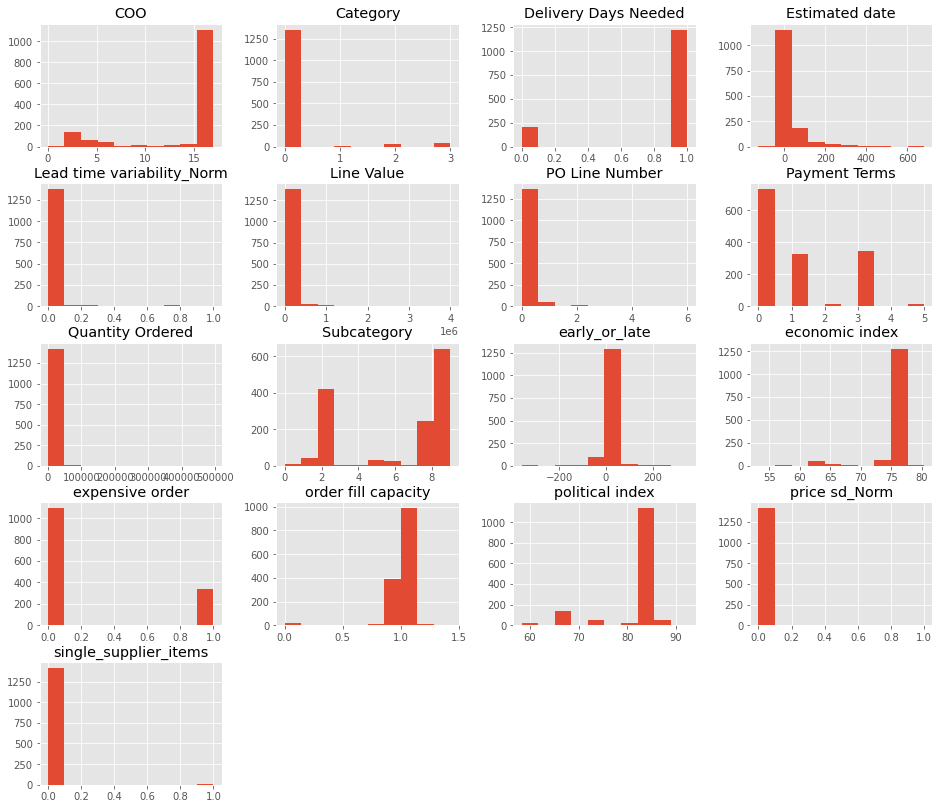

In [0]:
xycombine= x_le.join(y_reg)
import matplotlib.pyplot as plt
def draw(data):
    data.hist(figsize=(16,14))
    plt.savefig("Plots.jpg",dpi=300, pad_inches = 0)
    plt.show()
draw(xycombine)

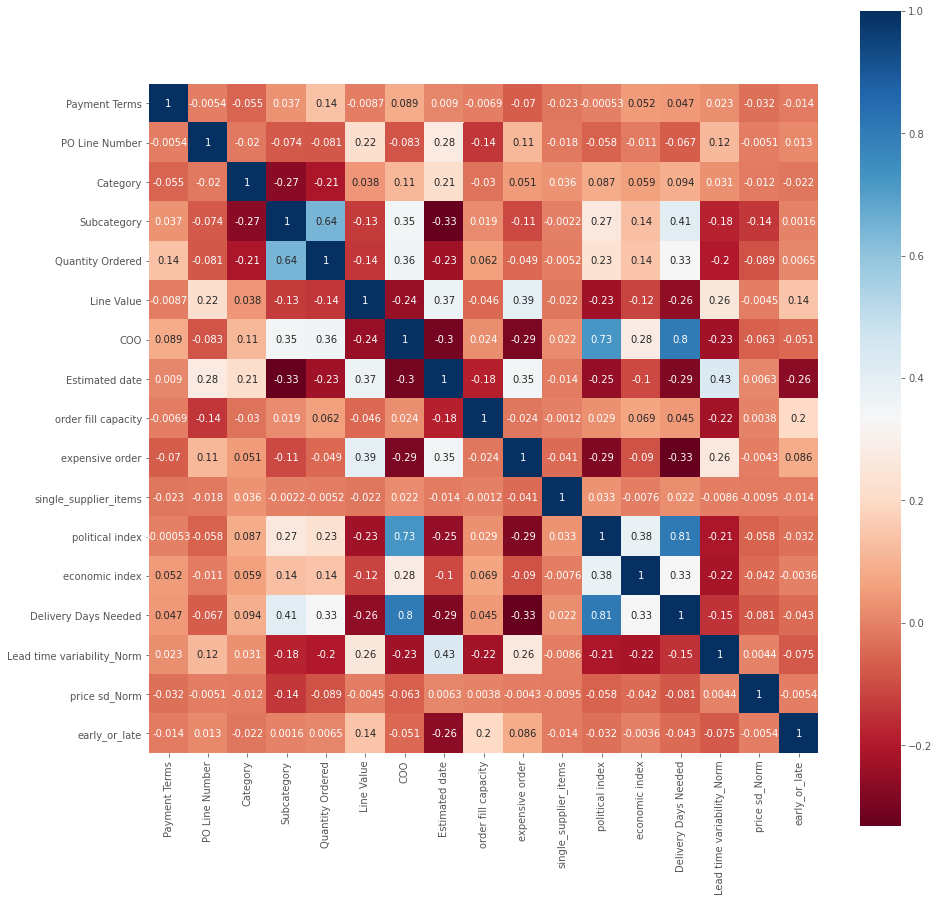

In [0]:
from sklearn.preprocessing import StandardScaler
def draw_heatmap(data):
    ylabels = data.columns.values.tolist()

    ss = StandardScaler()     # 归一化
    data = ss.fit_transform(data)

    df = pd.DataFrame(data)

    dfData = df.corr()
    plt.subplots(figsize=(15, 15)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True,yticklabels=ylabels,xticklabels=ylabels, cmap="RdBu")
    plt.show()
draw_heatmap(xycombine)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_le.values, i) for i in range(x_le.shape[1])]
vif["features"] = x_le.columns
vif

,VIF Factor,features
0,1.727239,Payment Terms
1,1.163862,PO Line Number
2,1.309463,Category
3,9.718855,Subcategory
4,3.512188,Quantity Ordered
5,1.427740,Line Value
6,28.293227,COO
7,2.054466,Estimated date
8,69.916851,order fill capacity
9,1.822573,expensive order


In [0]:
x_le_std = scaler.fit_transform(x_le)

#Classification

In [0]:
#roc curve function
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


def plot_roc_curve(model):
  #change to numpy array
  np_y_cls = y_cls.to_numpy()
  np_x_le = x_le.to_numpy()
  np_y_test_cls = test_y_cls.to_numpy()
  np_test_X_cls = test_X_cls.to_numpy()


  np_y_cls = label_binarize(np_y_cls, classes=[0, 1, 2])
  np_y_test_cls = label_binarize(np_y_test_cls, classes=[0, 1, 2])

  n_classes = np_y_cls.shape[1]
  if model == rfc:
    y_score = OneVsRestClassifier(model).fit(train_X_cls,train_y_cls).predict_proba(test_X_cls)
  else:
    y_score = model.fit(train_X_cls_std,train_y_cls).decision_function(test_X_cls_std)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(np_y_test_cls[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(np_y_test_cls.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()
  plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

## Logist Regression

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
log_reg = LogisticRegression()
log_reg.fit(train_X_cls_std,train_y_cls)
log_reg_predict = log_reg.predict(test_X_cls_std)
#R2 for Train
logRegr2_train = round(r2_score(train_y_cls,log_reg.predict(train_X_cls_std)),3)
#R2 for Test
logRegr2_test = round(r2_score(test_y_cls,log_reg_predict),3)

In [0]:
#logistic regression, predict the whole data
log = LogisticRegression()
log.fit(train_X_cls_std, train_y_cls)
log_predict = log.predict(x_le_std)


In [0]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_cls,log_predict)
print('Confusion Matrix : \n', cm_logistic)
# from confusion matrix calculate accuracy
total_logistic = sum(sum(cm_logistic))
accuracy_logistic = (cm_logistic[0,0]+cm_logistic[1,1]+cm_logistic[2,2])/total_logistic
print ('Accuracy : ', round(accuracy_logistic,3))

sensitivity_logistic = cm_logistic[0,0]/(cm_logistic[0,0]+cm_logistic[0,1])
print('Sensitivity : ', round(sensitivity_logistic,3))

specificity_logistic = cm_logistic[1,1]/(cm_logistic[1,0]+cm_logistic[1,1])
print('Specificity : ', round(specificity_logistic,3))

Confusion Matrix : 
 [[1104   16   27]
 [  65   17   11]
 [ 140    8   42]]
Accuracy :  0.813
Sensitivity :  0.986
Specificity :  0.207


In [0]:
from sklearn import metrics
metric_logtics = print(metrics.classification_report(test_y_cls, log_reg_predict, digits=3))

              precision    recall  f1-score   support

           0      0.851     0.966     0.905       349
           1      0.286     0.160     0.205        25
           2      0.474     0.164     0.243        55

    accuracy                          0.816       429
   macro avg      0.537     0.430     0.451       429
weighted avg      0.770     0.816     0.779       429



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


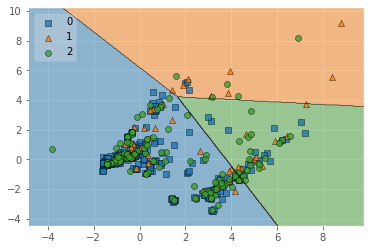

In [0]:
# classify visualization
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components = 2)
train_X_cls_std_log = pca.fit_transform(train_X_cls_std)
log_reg.fit(train_X_cls_std_log, train_y_cls)
plot_decision_regions(train_X_cls_std_log, train_y_cls.astype(np.integer).values, clf=log_reg, legend=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


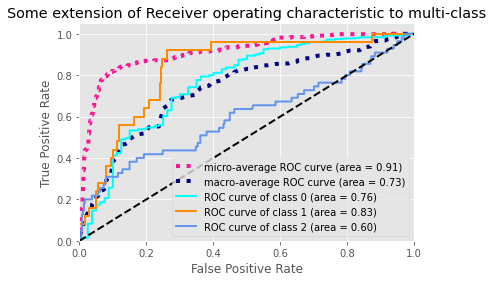

In [0]:
#plot logistic regression roc
plot_roc_curve(log_reg)

Feature: 0, Score: -0.04551
Feature: 1, Score: -0.03172
Feature: 2, Score: -0.10060
Feature: 3, Score: -0.01572
Feature: 4, Score: 0.50249
Feature: 5, Score: -0.08575
Feature: 6, Score: 0.24447
Feature: 7, Score: -0.15129
Feature: 8, Score: 0.16181
Feature: 9, Score: -0.15653
Feature: 10, Score: 0.11350
Feature: 11, Score: 0.03344
Feature: 12, Score: 0.02211
Feature: 13, Score: -0.02958
Feature: 14, Score: -0.07086
Feature: 15, Score: 0.24479


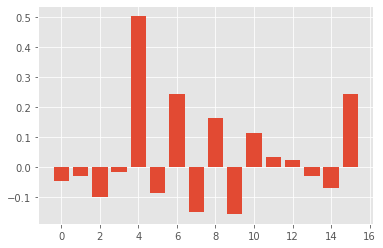

In [0]:
importance = log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [0]:
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#from google.colab import files
#train_X_cls.to_csv("train_x.csv")
#test_X_cls.to_csv("test_x.csv")
#files.download("train_x.csv")
#files.download("test_x.csv")

##Random Forest

In [0]:
#random forest: cls
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(train_X_cls,train_y_cls)
# predictions
rfc_predict_cls = rfc.predict(test_X_cls)

print(rmse(rfc_predict_cls, test_y_cls))
print(accuracy_score(test_y_cls, rfc_predict_cls))

0.7859488645679296
0.7878787878787878


In [0]:
cm_rfc = confusion_matrix(test_y_cls,rfc_predict_cls)
print('Confusion Matrix : \n', cm_rfc)
# from confusion matrix calculate accuracy
total_rfc = sum(sum(cm_rfc))
accuracy_rfc = (cm_rfc[0,0]+cm_rfc[1,1])/total_rfc
print ('Accuracy : ', round(accuracy_rfc,3))

sensitivity_rfc = cm_rfc[0,0]/(cm_rfc[0,0]+cm_rfc[0,1])
print('Sensitivity : ', round(sensitivity_rfc,3))

specificity_rfc = cm_rfc[1,1]/(cm_rfc[1,0]+cm_rfc[1,1])
print('Specificity : ', round(specificity_rfc,3))

Confusion Matrix : 
 [[315   8  26]
 [ 14   4   7]
 [ 32   4  19]]
Accuracy :  0.744
Sensitivity :  0.975
Specificity :  0.222


In [0]:
from sklearn import metrics
print(metrics.classification_report(test_y_cls, rfc_predict_cls, digits=3))

              precision    recall  f1-score   support

           0      0.873     0.903     0.887       349
           1      0.250     0.160     0.195        25
           2      0.365     0.345     0.355        55

    accuracy                          0.788       429
   macro avg      0.496     0.469     0.479       429
weighted avg      0.771     0.788     0.779       429



Feature ranking:
1. feature 7 (0.239082)
2. feature 5 (0.185601)
3. feature 4 (0.125826)
4. feature 15 (0.092629)
5. feature 14 (0.088522)
6. feature 8 (0.065769)
7. feature 3 (0.045630)
8. feature 0 (0.029377)
9. feature 6 (0.028083)
10. feature 1 (0.024185)
11. feature 11 (0.023148)
12. feature 12 (0.019059)
13. feature 9 (0.016385)
14. feature 2 (0.008391)
15. feature 13 (0.007615)
16. feature 10 (0.000698)


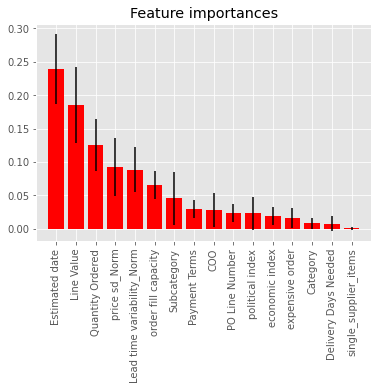

In [0]:
#random forest: feature importance
rfc_importances = rfc.feature_importances_
rfc_std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
rfc_indices = np.argsort(rfc_importances)[::-1]
feature_names = list(train_X_cls.columns)

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X_cls.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, rfc_indices[f], rfc_importances[rfc_indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X_cls.shape[1]), rfc_importances[rfc_indices],
       color="r", yerr=rfc_std[rfc_indices], align="center")
plt.xticks(range(train_X_cls.shape[1]), [feature_names[i] for i in rfc_indices], rotation  = 90)

plt.xlim([-1, train_X_cls.shape[1]])
plt.show()

In [0]:
from sklearn import metrics
print(metrics.classification_report(test_y_cls, rfc_predict_cls, digits=3))

              precision    recall  f1-score   support

           0      0.873     0.903     0.887       349
           1      0.250     0.160     0.195        25
           2      0.365     0.345     0.355        55

    accuracy                          0.788       429
   macro avg      0.496     0.469     0.479       429
weighted avg      0.771     0.788     0.779       429



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


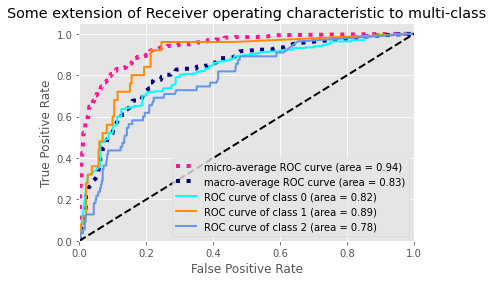

In [0]:
plot_roc_curve(rfc)

## Boosting

In [0]:
#xgb: cls
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X_cls, train_y_cls)
xgb_predict_cls = xgb.predict(test_X_cls)
print(accuracy_score(test_y_cls, xgb_predict_cls))
print(rmse(xgb_predict_cls, test_y_cls))

0.8251748251748252
0.6689936080056726


In [0]:
cm_xgb = confusion_matrix(test_y_cls,xgb_predict_cls)
print('Confusion Matrix : \n', cm_xgb)
# from confusion matrix calculate accuracy
total_xgb = sum(sum(cm_xgb))
accuracy_xgb = (cm_xgb[0,0]+cm_xgb[1,1])/total_xgb
print ('Accuracy : ', round(accuracy_xgb,3))

sensitivity_xgb = cm_xgb[0,0]/(cm_xgb[0,0]+cm_xgb[0,1])
print('Sensitivity : ', round(sensitivity_xgb,3))

specificity_xgb = cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1])
print('Specificity : ', round(specificity_xgb,3))

Confusion Matrix : 
 [[332   8   9]
 [ 17   3   5]
 [ 30   6  19]]
Accuracy :  0.781
Sensitivity :  0.976
Specificity :  0.15


In [0]:
from sklearn import metrics
print(metrics.classification_report(test_y_cls, xgb_predict_cls, digits=3))

              precision    recall  f1-score   support

           0      0.876     0.951     0.912       349
           1      0.176     0.120     0.143        25
           2      0.576     0.345     0.432        55

    accuracy                          0.825       429
   macro avg      0.543     0.472     0.496       429
weighted avg      0.797     0.825     0.806       429



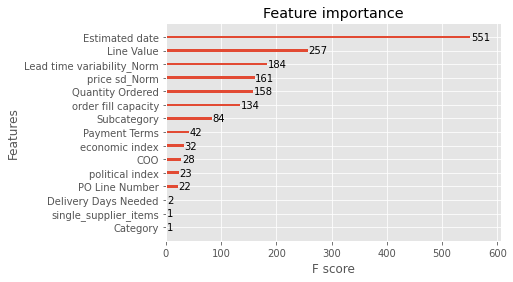

In [0]:
#xgb: feature importance
from xgboost import plot_importance
plot_importance(xgb.get_booster())


##SVC Linear

In [0]:
# fit model
from sklearn.svm import SVC
svc_linear = SVC(decision_function_shape='ovr')
svc_linear.fit(train_X_cls_std, train_y_cls)
y_pre_svclinear = svc_linear.predict(test_X_cls_std)

In [0]:
from sklearn import metrics
print(metrics.classification_report(test_y_cls, y_pre_svclinear, digits=3))

              precision    recall  f1-score   support

           0      0.859     0.960     0.907       349
           1      0.500     0.040     0.074        25
           2      0.405     0.273     0.326        55

    accuracy                          0.818       429
   macro avg      0.588     0.424     0.436       429
weighted avg      0.780     0.818     0.784       429



In [0]:
# Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm_svclinear = confusion_matrix(test_y_cls,y_pre_svclinear)
print('Confusion Matrix : \n', cm_svclinear)
total_svclinear = sum(sum(cm_svclinear))

# from confusion matrix calculate accuracy
accuracy_svclinear = (cm_svclinear[0,0]+cm_svclinear[1,1])/total_svclinear
print ('Accuracy : ', round(accuracy_svclinear,3))

sensitivity_svclinear = cm_svclinear[0,0]/(cm_svclinear[0,0]+cm_svclinear[0,1])
print('Sensitivity : ', round(sensitivity_svclinear,3))

specificity_svclinear = cm_svclinear[1,1]/(cm_svclinear[1,0]+cm_svclinear[1,1])
print('Specificity : ', round(specificity_svclinear,3))

# rmse
print('RMSE : ', round(rmse(y_pre_svclinear, test_y_cls),3))

Confusion Matrix : 
 [[335   1  13]
 [ 15   1   9]
 [ 40   0  15]]
Accuracy :  0.783
Sensitivity :  0.997
Specificity :  0.062
RMSE :  0.743


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


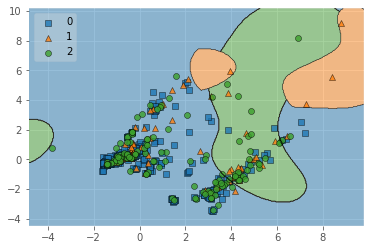

In [0]:
# classify visualization
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components = 2)
train_X_cls_std_linear = pca.fit_transform(train_X_cls_std)
svc_linear.fit(train_X_cls_std_linear, train_y_cls)
plot_decision_regions(train_X_cls_std_linear, train_y_cls.astype(np.integer).values, clf=svc_linear, legend=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


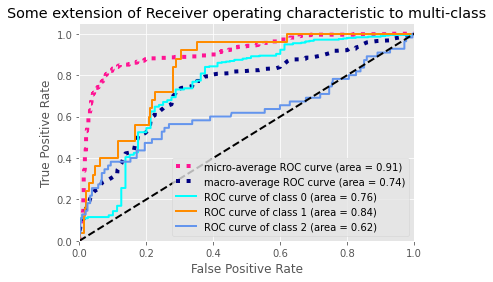

In [0]:
plot_roc_curve(svc_linear)

## SVC Polynom

In [0]:
# fit model
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly')
svc_poly.fit(train_X_cls_std, train_y_cls)
y_pre_svcpoly = svc_poly.predict(test_X_cls_std)

In [0]:
print(metrics.classification_report(test_y_cls, y_pre_svcpoly, digits=3))

              precision    recall  f1-score   support

           0      0.866     0.946     0.904       349
           1      0.250     0.120     0.162        25
           2      0.417     0.273     0.330        55

    accuracy                          0.811       429
   macro avg      0.511     0.446     0.465       429
weighted avg      0.773     0.811     0.787       429



In [0]:
# Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm_svcpoly = confusion_matrix(test_y_cls,y_pre_svcpoly)
print('Confusion Matrix : \n', cm_svcpoly)
total_svcpoly = sum(sum(cm_svcpoly))

# from confusion matrix calculate accuracy
accuracy_svcpoly = (cm_svcpoly[0,0]+cm_svcpoly[1,1])/total_svcpoly
print ('Accuracy : ', round(accuracy_svcpoly,3))

sensitivity_svcpoly = cm_svcpoly[0,0]/(cm_svcpoly[0,0]+cm_svcpoly[0,1])
print('Sensitivity : ', round(sensitivity_svcpoly,3))

specificity_svcpoly = cm_svcpoly[1,1]/(cm_svcpoly[1,0]+cm_svcpoly[1,1])
print('Specificity : ', round(specificity_svcpoly,3))

# rmse
print('RMSE : ', round(rmse(y_pre_svcpoly, test_y_cls),3))

Confusion Matrix : 
 [[330   5  14]
 [ 15   3   7]
 [ 36   4  15]]
Accuracy :  0.776
Sensitivity :  0.985
Specificity :  0.167
RMSE :  0.734


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


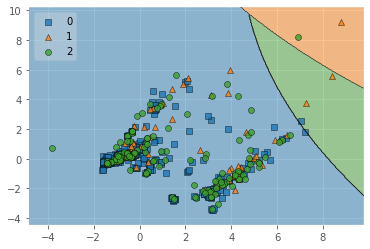

In [0]:
# classify visualization
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components = 2)
train_X_cls_std_poly = pca.fit_transform(train_X_cls_std)
svc_poly.fit(train_X_cls_std_poly, train_y_cls)
plot_decision_regions(train_X_cls_std_poly, train_y_cls.astype(np.integer).values, clf=svc_poly, legend=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


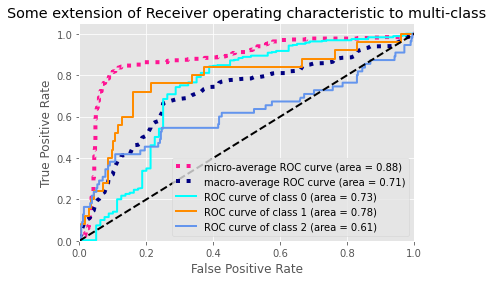

In [0]:
plot_roc_curve(svc_poly)

##SVC radial 

In [0]:
# fit model
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(train_X_cls_std, train_y_cls)
y_pre_svcrbf = svc_rbf.predict(test_X_cls_std)

In [0]:
print(metrics.classification_report(test_y_cls, y_pre_svcrbf, digits=3))

              precision    recall  f1-score   support

           0      0.859     0.960     0.907       349
           1      0.500     0.040     0.074        25
           2      0.405     0.273     0.326        55

    accuracy                          0.818       429
   macro avg      0.588     0.424     0.436       429
weighted avg      0.780     0.818     0.784       429



In [0]:
# Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm_svcrbf = confusion_matrix(test_y_cls,y_pre_svcrbf)
print('Confusion Matrix : \n', cm_svcrbf)
total_svcrbf = sum(sum(cm_svcrbf))

# from confusion matrix calculate accuracy
accuracy_svcrbf = (cm_svcrbf[0,0]+cm_svcrbf[1,1])/total_svcrbf
print ('Accuracy : ', round(accuracy_svcrbf,3))

sensitivity_svcrbf = cm_svcrbf[0,0]/(cm_svcrbf[0,0]+cm_svcrbf[0,1])
print('Sensitivity : ', round(sensitivity_svcrbf,3))

specificity_svcrbf = cm_svcrbf[1,1]/(cm_svcrbf[1,0]+cm_svcrbf[1,1])
print('Specificity : ', round(specificity_svcrbf,3))

# rmse
print('RMSE : ', round(rmse(y_pre_svcrbf, test_y_cls),3))

Confusion Matrix : 
 [[335   1  13]
 [ 15   1   9]
 [ 40   0  15]]
Accuracy :  0.783
Sensitivity :  0.997
Specificity :  0.062
RMSE :  0.743


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


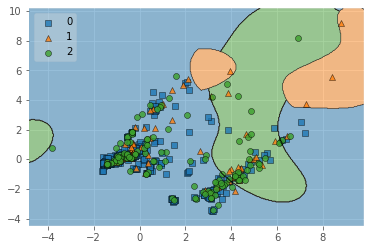

In [0]:
# classify visualization
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components = 2)
train_X_cls_std_rbf = pca.fit_transform(train_X_cls_std)
svc_rbf.fit(train_X_cls_std_rbf, train_y_cls)
plot_decision_regions(train_X_cls_std_rbf, train_y_cls.astype(np.integer).values, clf=svc_rbf, legend=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


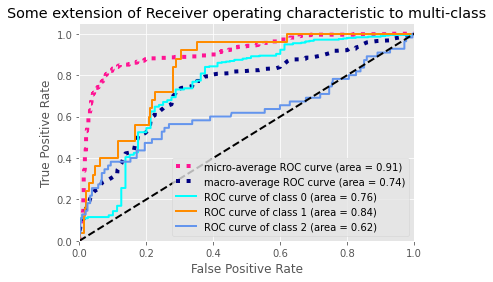

In [0]:
plot_roc_curve(svc_rbf)

## SVC sigmoid

In [0]:
# fit model
from sklearn.svm import SVC
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(train_X_cls_std, train_y_cls)
y_pre_svcsigmoid = svc_sigmoid.predict(test_X_cls_std)

In [0]:
print(metrics.classification_report(test_y_cls, y_pre_svcsigmoid, digits=3))

              precision    recall  f1-score   support

           0      0.869     0.891     0.880       349
           1      0.100     0.080     0.089        25
           2      0.275     0.255     0.264        55

    accuracy                          0.762       429
   macro avg      0.414     0.409     0.411       429
weighted avg      0.748     0.762     0.755       429



In [0]:
# Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm_svcsigmoid = confusion_matrix(test_y_cls,y_pre_svcsigmoid)
print('Confusion Matrix : \n', cm_svcsigmoid)
total_svcsigmoid = sum(sum(cm_svcsigmoid))

# from confusion matrix calculate accuracy
accuracy_svcsigmoid = (cm_svcsigmoid[0,0]+cm_svcsigmoid[1,1])/total_svcsigmoid
print ('Accuracy : ', round(accuracy_svcsigmoid,3))

sensitivity_svcsigmoid = cm_svcsigmoid[0,0]/(cm_svcsigmoid[0,0]+cm_svcsigmoid[0,1])
print('Sensitivity : ', round(sensitivity_svcsigmoid,3))

specificity_svcsigmoid = cm_svcsigmoid[1,1]/(cm_svcsigmoid[1,0]+cm_svcsigmoid[1,1])
print('Specificity : ', round(specificity_svcsigmoid,3))

# rmse
print('RMSE : ', round(rmse(y_pre_svcsigmoid, test_y_cls),3))

Confusion Matrix : 
 [[311  12  26]
 [ 12   2  11]
 [ 35   6  14]]
Accuracy :  0.73
Sensitivity :  0.963
Specificity :  0.143
RMSE :  0.815


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


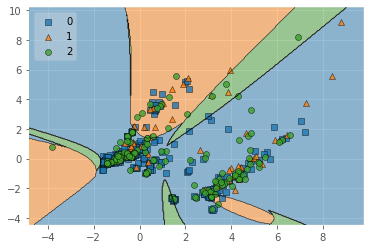

In [0]:
# classify visualization
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components = 2)
train_X_cls_std_sigmoid = pca.fit_transform(train_X_cls_std)
svc_sigmoid.fit(train_X_cls_std_sigmoid, train_y_cls)
plot_decision_regions(train_X_cls_std_sigmoid, train_y_cls.astype(np.integer).values, clf=svc_sigmoid, legend=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


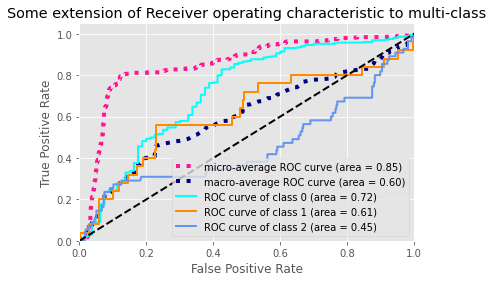

In [0]:
plot_roc_curve(svc_sigmoid)

# Regression

## Linear Regression

In [0]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(train_X_reg_std,train_y_reg)
lin_reg_predict = lin_reg.predict(test_X_reg_std)
#R2 for Train
linRegr2_train = r2_score(train_y_reg,lin_reg.predict(train_X_reg_std))
#R2 for Test
linRegr2_test = r2_score(test_y_reg,lin_reg_predict)

In [0]:
#Linear Regression Results: R2
print("R2 for train and test: ",[linRegr2_train,linRegr2_test])
#Linear Regression Results: RMSE
print("RMSE:", rmse(lin_reg_predict,test_y_reg))

R2 for train and test:  [0.2799281782353834, 0.026202197839911734]
RMSE: 32.47484836124885


Text(0.5, 1.0, 'Linger Regression: Real vs Predicted Delivery Results')

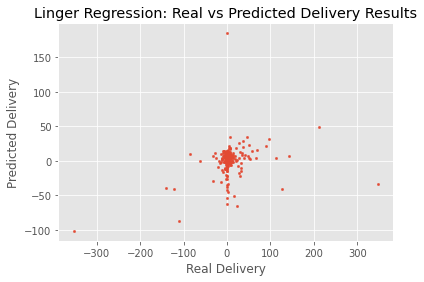

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( test_y_reg, lin_reg_predict, s=5 )
plt.xlabel( "Real Delivery")
plt.ylabel( "Predicted Delivery")
plt.title( "Linger Regression: Real vs Predicted Delivery Results")

## Lasso Regression

In [0]:
#Lasso Regression
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
lasso_reg = LassoCV()
lasso_reg.fit(train_X_reg_std,train_y_reg)
lasso_reg_predict = lasso_reg.predict(test_X_reg_std)
#R2 for Train
lassoRegr2_train = round(r2_score(train_y_reg,lasso_reg.predict(train_X_reg_std)),3)
#R2 for Test
lassoRegr2_test = round(r2_score(test_y_reg,lasso_reg_predict),3)

In [0]:
#Lasso Regression Result:R2
print("R2 for train and test: ",[lassoRegr2_train,lassoRegr2_test])
#Lasso Regression Results: RMSE
print("RMSE:", rmse(lasso_reg_predict,test_y_reg))

R2 for train and test:  [0.269, 0.058]
RMSE: 31.94217208113689


Text(0.5, 1.0, 'Lasso Regression: Real vs Predicted Delivery Results')

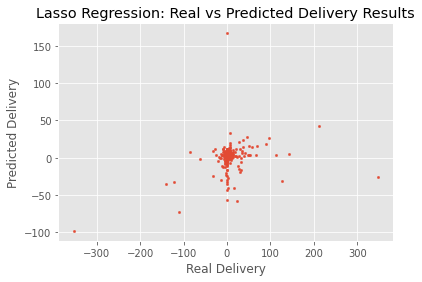

In [0]:
plt.scatter( test_y_reg, lasso_reg_predict, s=5 )
plt.xlabel( "Real Delivery")
plt.ylabel( "Predicted Delivery")
plt.title( "Lasso Regression: Real vs Predicted Delivery Results")

## Ridge Regression

In [0]:
#Ridge Regression
from sklearn.linear_model import Ridge, RidgeCV
ridge_reg = RidgeCV()
ridge_reg.fit(train_X_reg_std,train_y_reg)
ridge_reg_predict = ridge_reg.predict(test_X_reg_std)
#R2 for Train
ridgeRegr2_train = round(r2_score(train_y_reg,ridge_reg.predict(train_X_reg_std)),3)
#R2 for Test
ridgeRegr2_test = round(r2_score(test_y_reg,ridge_reg_predict),3)

In [0]:
#Ridge Regression Result:R2
print("R2 for train and test: ",[ridgeRegr2_train,ridgeRegr2_test])
#Ridge Regression Result:RMSE
print("RMSE:",rmse(ridge_reg_predict,test_y_reg))

R2 for train and test:  [0.28, 0.031]
RMSE: 32.39485642208615


Text(0.5, 1.0, 'Ridge Regression: Real vs Predicted Delivery Results')

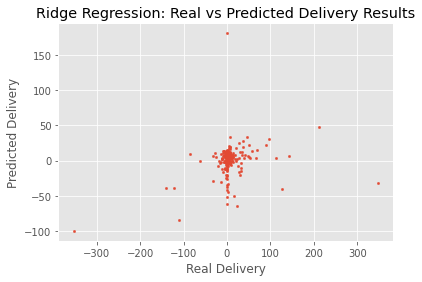

In [0]:
plt.scatter( test_y_reg, ridge_reg_predict, s=5 )
plt.xlabel( "Real Delivery")
plt.ylabel( "Predicted Delivery")
plt.title( "Ridge Regression: Real vs Predicted Delivery Results")

## Elastic Net Regression

In [0]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet,ElasticNetCV
elsnet_reg = ElasticNetCV()
elsnet_reg.fit(train_X_reg_std,train_y_reg)
elsnet_reg_predict = elsnet_reg.predict(test_X_reg_std)
#R2 for Train
elsnetRegr2_train = round(r2_score(train_y_reg,elsnet_reg.predict(train_X_reg_std)),3)
#R2 for Test
elsnetRegr2_test = round(r2_score(test_y_reg,elsnet_reg_predict),3)

R2 for train and test:  [0.263, 0.07]
RMSE: 31.732773408404242


Text(0.5, 1.0, 'Elastic Net: Real vs Predicted Delivery Results')

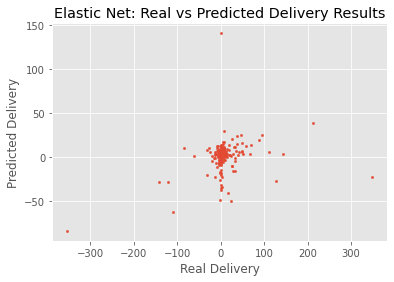

In [0]:
#Elastic Net Regression Result:R2
print("R2 for train and test: ",[elsnetRegr2_train,elsnetRegr2_test])
#Elastic Net Regression Result:RMSE
print("RMSE:",rmse(elsnet_reg_predict,test_y_reg))
plt.scatter( test_y_reg, elsnet_reg_predict, s=5 )
plt.xlabel( "Real Delivery")
plt.ylabel( "Predicted Delivery")
plt.title( "Elastic Net: Real vs Predicted Delivery Results")

## Random Forest

In [0]:
#random forest: reg
from sklearn.ensemble import RandomForestRegressor
regrf = RandomForestRegressor()
regrf.fit(train_X_reg,train_y_reg)
# predictions
regrf_predict_reg = regrf.predict(test_X_reg)
print(rmse(regrf_predict_reg, test_y_reg))
print(r2_score(test_y_reg, regrf_predict_reg))

31.45785995409098
0.08623845802294272


## Boosting

In [0]:
#boosting: reg
from xgboost import XGBRegressor
regxgb = XGBRegressor()
regxgb.fit(train_X_reg, train_y_reg)
regxgb_predict_reg = regxgb.predict(test_X_reg)
print(r2_score(test_y_reg, regxgb_predict_reg))
print(rmse(regxgb_predict_reg, test_y_reg))

[03:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.12714210542544246
30.7457087577848


## SVM

In [0]:
# SVC regression--linear
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
svc_reg_linear = SVR(kernel='linear')
svc_reg_linear.fit(train_X_reg_std, train_y_reg)
y_pre_svc_reg_linear = svc_reg_linear.predict(test_X_reg_std)
y_pre_svc_reg_linear

#R2 for Test
print("R2:", r2_score(test_y_reg,y_pre_svc_reg_linear))
#SVM Regression--linear Results: RMSE
print("RMSE:", rmse(test_y_reg,y_pre_svc_reg_linear))




R2: 0.011985097569633063
RMSE: 32.711049966701886


In [0]:
# SVC Regression--polynomial
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
svc_reg_poly = SVR(kernel='poly', degree=3, gamma='auto',coef0=0, tol=0.001, C=1, epsilon=7, shrinking=True, cache_size=300, verbose=False, max_iter=-1)
svc_reg_poly.fit(train_X_reg_std, train_y_reg)
y_pre_svc_reg_poly = svc_reg_poly.predict(test_X_reg_std)
y_pre_svc_reg_poly

#R2 for Test
R2_svc_poly= r2_score(test_y_reg,y_pre_svc_reg_poly)
print("R2:", r2_score(test_y_reg,y_pre_svc_reg_poly))
#Linear Regression Results: RMSE
print("RMSE:", rmse(test_y_reg,y_pre_svc_reg_poly))

R2: 0.28354702230961193
RMSE: 27.855219357605325


In [0]:
support_indices = svc_reg_poly.n_support_
svc_reg_poly.dual_coef_[0:support_indices[0]]

array([[-0.29104913,  1.        , -1.        , -1.        ,  1.        ,
         1.        ,  1.        , -1.        ,  1.        ,  1.        ,
        -1.        , -1.        ,  1.        ,  0.14779243, -1.        ,
        -1.        ,  1.        ,  0.52695865,  1.        , -1.        ,
         1.        , -1.        ,  1.        , -1.        , -1.        ,
        -1.        ,  1.        ,  0.07999899,  1.        , -1.        ,
        -1.        , -1.        ,  1.        , -0.12426721, -1.        ,
         1.        ,  0.05287531, -1.        ,  1.        , -1.        ,
         1.        ,  1.        ,  1.        ,  0.82450032,  1.        ,
        -1.        , -1.        ,  0.53138709, -0.22735536, -1.        ,
         1.        ,  1.        , -1.        ,  1.        , -1.        ,
         1.        ,  1.        ,  1.        , -1.        ,  1.        ,
         0.02266291,  1.        , -1.        ,  1.        , -1.        ,
        -1.        ,  0.70832694, -1.        ,  1. 

In [0]:
# SVC Regression--rbf
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
svc_reg_rbf = SVR(kernel='rbf')
svc_reg_rbf.fit(train_X_reg_std, train_y_reg)
y_pre_svc_reg_rbf = svc_reg_rbf.predict(test_X_reg_std)
y_pre_svc_reg_rbf

#R2 for Test
R2_svc_rbf= r2_score(test_y_reg,y_pre_svc_reg_rbf)
print("R2:", r2_score(test_y_reg,y_pre_svc_reg_rbf))
#Linear Regression Results: RMSE
print("RMSE:", rmse(test_y_reg,y_pre_svc_reg_rbf))

R2: 0.004419459387275282
RMSE: 32.83605213478181
